Relatorio:

* Serão 3 tipos de classes.
  - Sendo atribuido valores ao primeiro de 59
  - Ao segundo de  segundo de 71 
  - Ao terceiro de 48.
  
* No total termos um total de 178. 
* Com uma dimensão de valor 13.
* tendo no final dois valores existentes
  - Real ou Positivo.

In [ ]:
import torch

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
dados = wine.data
classes = wine.target
nomesClasses = wine.target_names

In [ ]:
classes.size

178

In [ ]:
dados

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
for coluna in dados.T:
  # print(coluna.max()) # Valores máximos de cada coluna
  if coluna.max() < 1:
    coluna = coluna / 1
  elif coluna.max() < 10:
    coluna /= 10
  elif coluna.max() < 100:
    coluna /= 100
  elif coluna.max() < 1000:
    coluna /= 1000
  elif coluna.max() < 10000:
    coluna /= 10000
  else:
    print('Erro')

In [ ]:
import numpy as np
# saida = np.where(condição, true, false)
saida = np.where(classes== 0, 1, 0)
print(saida)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
entrada = torch.FloatTensor(dados)
saida = torch.FloatTensor(saida)
print(saida)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
from sklearn.utils import shuffle
print(entrada, saida)
entrada, saida = shuffle(entrada, saida)
print(entrada, saida)

tensor([[0.1423, 0.1710, 0.2430,  ..., 0.1040, 0.3920, 0.1065],
        [0.1320, 0.1780, 0.2140,  ..., 0.1050, 0.3400, 0.1050],
        [0.1316, 0.2360, 0.2670,  ..., 0.1030, 0.3170, 0.1185],
        ...,
        [0.1327, 0.4280, 0.2260,  ..., 0.0590, 0.1560, 0.0835],
        [0.1317, 0.2590, 0.2370,  ..., 0.0600, 0.1620, 0.0840],
        [0.1413, 0.4100, 0.2740,  ..., 0.0610, 0.1600, 0.0560]]) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
entrada_treinamento = entrada[0:150, :]
saida_treinamento = saida[0:150]
entrada_testes = entrada[150:178, :]
saida_testes = saida[150:178]
print(entrada_testes)
print(saida_testes)

tensor([[0.1382, 0.1750, 0.2420, 0.1400, 0.1110, 0.3880, 0.3740, 0.3200, 0.1870,
         0.0705, 0.1010, 0.3260, 0.1190],
        [0.1242, 0.1610, 0.2190, 0.2250, 0.1080, 0.2000, 0.2090, 0.3400, 0.1610,
         0.0206, 0.1060, 0.2960, 0.0345],
        [0.1270, 0.3870, 0.2400, 0.2300, 0.1010, 0.2830, 0.2550, 0.4300, 0.1950,
         0.0257, 0.1190, 0.3130, 0.0463],
        [0.1387, 0.1900, 0.2800, 0.1940, 0.1070, 0.2950, 0.2970, 0.3700, 0.1760,
         0.0450, 0.1250, 0.3400, 0.0915],
        [0.1229, 0.3170, 0.2210, 0.1800, 0.0880, 0.2850, 0.2990, 0.4500, 0.2810,
         0.0230, 0.1420, 0.2830, 0.0406],
        [0.1406, 0.2150, 0.2610, 0.1760, 0.1210, 0.2600, 0.2510, 0.3100, 0.1250,
         0.0505, 0.1060, 0.3580, 0.1295],
        [0.1277, 0.3430, 0.1980, 0.1600, 0.0800, 0.1630, 0.1250, 0.4300, 0.0830,
         0.0340, 0.0700, 0.2120, 0.0372],
        [0.1378, 0.2760, 0.2300, 0.2200, 0.0900, 0.1350, 0.0680, 0.4100, 0.1030,
         0.0958, 0.0700, 0.1680, 0.0615],
        [0.1221,

In [ ]:
# Montar o modelo para o treinamento
print(entrada_treinamento.size())
input_size = entrada_treinamento.size()[1]
hidden_size = 10
modelo = Net(input_size, hidden_size)
print(modelo)

# Configurações do modelo
criterion = torch.nn.BCELoss() # Binary Cross Entropy
criterion = torch.nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.9, momentum = 0.2)

torch.Size([150, 13])
Net(
  (fc1): Linear(in_features=13, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
epochs = 3000 # Quantidade de épocas de treinamento

errors = [] # Criando um array vazio para guardar os erros de cada epoca

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  #Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 10000 == 0:
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
  #Backward pass
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.2842795252799988


In [ ]:
y_pred = modelo(entrada_testes)
print(y_pred) # valor previsto pela rede
print(saida_testes) # valor real

tensor([[9.8961e-01],
        [1.9466e-04],
        [3.5333e-02],
        [9.6215e-01],
        [2.2918e-02],
        [9.9523e-01],
        [1.0143e-03],
        [3.9069e-04],
        [2.0774e-03],
        [6.0368e-03],
        [2.4602e-04],
        [9.9518e-01],
        [5.6700e-03],
        [3.3421e-03],
        [9.5259e-04],
        [9.8777e-01],
        [2.3618e-03],
        [8.4062e-03],
        [6.3424e-04],
        [9.9317e-01],
        [9.6383e-01],
        [6.5719e-04],
        [5.5127e-04],
        [9.9444e-01],
        [9.5499e-01],
        [6.3331e-03],
        [6.0815e-05],
        [6.4850e-04]], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0.])


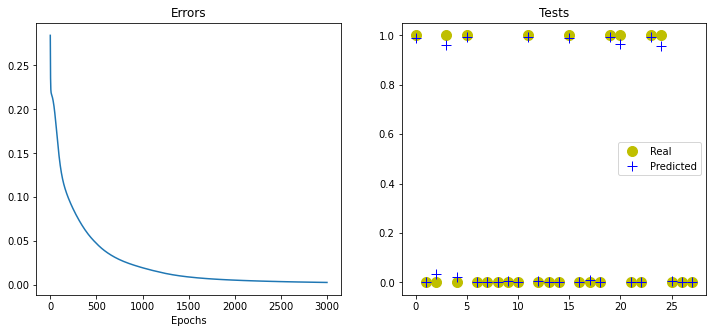

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

In [ ]:
classes.size

178